KoNLPy 설치
-----

자세한 설치방법<br>
https://hong-yp-ml-records.tistory.com/37?category=847360<br>
제 블로그입니다...^^

1. JDK 다운 받기<br>
http://www.oracle.com/technetwork/java/javase/downloads/index.html<br>
위 링크에서 자신의 컴퓨터 OS에 맞는 JDK 파일을 다운로드 받은 뒤 파일을 실행시킵니다.

2. 시스템 환경 변수 설정하기<br>
컴퓨터에서 시스템 환경 변수 편집(제어판)을 검색합니다.<br>
누르면 나오는 창에서 고급 탭의 환경변수를 누릅니다.<br>
위의 사용자 변수에서 '새로 만들기' 버튼을 누르고 변수 이름에 'JAVA_HOME', 값에는 앞서 다운받은 JDK 파일의 경로를 붙여 넣습니다.<br>
아래 시스템 변수에서도 똑같은 작업을 해줍니다.
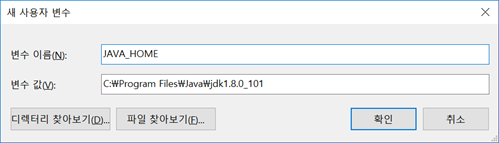
3. JPype 설치하기<br>
http://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype<br>
위 링크에서 자신의 파이썬 버전과 OS에 맞는 파일을 다운로드 받습니다.<br>
(파이썬 버전 확인 방법: anaconda prompt에 python -V 입력)<br>
다음 파일의 경로를 복사한 뒤 cmd 창에서 해당 경로로 전환해줍니다.<br>
이후 .whl파일 명을 복사한 뒤 `pip install [파일명.whl]`을 실행해줍니다.<br>
만약 업데이트가 필요하다는 문구가 뜬다면 `python -m pip install --upgrade pip`를 입력하세요.

4. KoNLPy 설치하기<br>
마지막은 간단합니다. anaconda prompt에 `pip install konlpy`를 입력하시면 됩니다.

'수돗물 유충' 네이버 기사 워드 클라우드
-----
워드 클라우드는 텍스트에 쓰인 단어를 빈도 분석한 후 시각화 한 결과물을 말합니다.<br>
때문에 워드 클라우드는 '빈도 분석'을 우선시하는데요, '빈도 분석' 이후 결과물을 시각화하여 봅시다.

In [1]:
# import


In [84]:
# Okt 불러오기
# Twitter의 이름이 Okt로 변경됨.


# twitter = konlpy.tag.twitter()로도 활용할 수 있음.

<img src="konlpy1.png" alt="주요옵션" style="width: 600px;"/>

<img src="konlpy2.png" alt="주요옵션" style="width: 600px;"/>

In [85]:
import pandas as pd
import re

In [111]:
# 데이터 불러오기
df = pd.read_csv('네이버 뉴스 크롤링.csv')
df.head()

In [87]:
# 데이터 정보 확인하기 .info()


In [88]:
# 데이터 결측값 개수 확인하기 


In [89]:
# 결측값 제거 및 인덱스 초기화


In [2]:
# 지난시간에 배운 re를 활용하여 Text Cleaning 연습 (두번째 기사제목)


In [11]:
# Text Cleaning
data_list = []

for k in range(len(df["기사 제목"])):
    title = re.sub('[^\w\s]',' ',df["기사 제목"][k])
    time = df["기사 작성일"][k]
    data = title, time
    data_list.append(data)

In [12]:
# 새로운 데이터 프레임 만들기
df2 = pd.DataFrame(data_list, columns = ['기사 제목', '기사 작성일'])

In [91]:
# 데이터프레임 확인하기


In [92]:
# Okt 활용하기 (1); morphs로 토큰화하기


In [93]:
# Okt 활용하기 (2) pos로 품사 태깅하기


In [94]:
# Okt 활용하기 (3); nouns로 명사만 추출하기


In [42]:
# 명사만 추출하여 새로운 데이터프레임 만들기
data_list = []

for k in range(len(df2["기사 제목"])):
    word_list = okt.nouns(df2["기사 제목"][k])
    for word in word_list:
        time = df2["기사 작성일"][k]
        data = word, time
        data_list.append(data)
        
df3 = pd.DataFrame(data_list, columns = ['단어', '기사 작성일'])

In [43]:
# 새로운 데이터프레임 확인하기
df3.head()

,단어,기사 작성일
0,광주,2020.07.18.
1,수돗물,2020.07.18.
2,유충,2020.07.18.
3,신고,2020.07.18.
4,정수,2020.07.18.


In [95]:
# 새로운 데이터프레임의 데이터 타입 확인하기


In [96]:
# '유충'이라는 단어로 Boolean Indexing하여 새로운 데이터프레임 생성


In [97]:
# '유충' 데이터프레임 확인


In [98]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['font.family'].insert(0, 'Malgun Gothic')

In [100]:
# 날짜를 기준으로 단어 countplot 그리기


In [102]:
# '서울'이라는 단어로 Boolean Indexing하여 새로운 데이터프레임 생성


In [103]:
# '서울'단어의 데이터프레임 확인


In [105]:
# 날짜를 기준으로 단어 countplot 그리기


In [64]:
# 컨테이너에 동일한 값의 자료가 몇개인지를 파악하는데 사용하는 객체
from collections import Counter

In [106]:
# 단어 빈도수 측정하기


In [66]:
# 불용어와 불필요한 1글자 단어를 제거하는 함수를 생성한다.
# 편리하게 사용가능한 '불용어 사전'이라는 것도 있지만 이번 과정에서는 최대한 노가다해보자..^^

stopword_list = ["서도", "외적"]

# 불용어 제거 함수
def remove_stopwords(words):
    result = []
    for w in words:
        if w not in stopword_list:
            result.append(w)
    return result
                
# 한 글자 단어 제거 함수
def remove_onewords(words):
    result = []
    for w in words:
        if len(w) != 1:
            result.append(w)
    return result

In [67]:
# 최종 함수 생성 (토큰화 + 불용어제거)

data_list = []

def tokenizing_and_cleaning(raw_text):
    
    # 명사 단위로 토큰화 하는 과정
    token = okt.nouns(raw_text)
    
    # 불용어 제거 
    stopwords = remove_stopwords(token)

    # 한글자 단어 제거 
    meaningful_words = remove_onewords(stopwords)
    
    data_list.append(meaningful_words)

In [113]:
# 함수 적용


# data_list 리스트 안의 단어들로 토큰만 들어있는 리스트를 만든다.

word_list = []



# Q. append가 아닌 extend를 사용하는 이유는 무엇인가?


In [108]:
# 데이터프레임으로 만들어준다.
all_token = pd.DataFrame(word_list, columns = ["토큰"])
all_token.head()

In [107]:
# 상위 빈도순 100개


In [109]:
# 데이터프레임으로 만들어준다.
most_token = pd.DataFrame(most_word, columns = ["단어 토큰", "빈도 수"])
most_token

In [110]:
# 워드 클라우드를 만들기 위해 사전(딕셔너리) 형태로 변경하기


In [ ]:
! pip install wordcloud

In [78]:
# 미설치시 ! pip install wordcloud
from wordcloud import WordCloud

In [79]:
# 워드클라우드 마스크 코드
# 마스크를 위한 이미지는 png파일로 그림을 제외한 배경이 투명해야합니다. (포토샵의 바둑판표시)
# 이미지 크기를 잘 조절해야 폰트가 깨지지 않는 선에서 글씨가 빼곡하게 들어갑니다! 
# plt의 colormap을 사용하여 원하는 색상을 지정해줄 수 있습니다.

from PIL import Image
import numpy as np
import random

icon = Image.open('larva.png')
mask = Image.new("RGB", icon.size, (400,400,400))
mask.paste(icon,icon)
mask = np.array(mask)
cmap = plt.cm.PuBu

# 아래의 코드는 이미지 본 색상을 따라가는 코드입니다. (그림 색상을 그대로 가져와서 사용해야 할 때 ex.태극 문양)
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

# 시각화 하기 가장 좋고, 이쁘게 많은 정보를 표현할 수 있는 방법은 포토샵입니다!!!

In [ ]:
# 워드 클라우드 출력하기
wc = WordCloud(font_path = 'font.ttf',      # 폰트 지정 (본인이 원하는 폰트를 현재 디렉토리로 복붙하셔야합니다.) C:\Windows\Fonts에 있는 폰트를 복붙, 영어로 글꼴이름 변경
               mask = mask,                 # 위에서 만들어준 마스크 지정
               background_color = "black",  # 배경색 지정
               max_font_size = 250,         # 폰트사이즈지정 (그림을 구체화 시킬 때 사용합니다. 적당한 선을 본인 그림에 맞게 찾으셔야합니다.)
               margin = 0,                  # 토큰 사이사이의 빈 칸 크기 지정 (0이 가장 빼곡하므로 좋습니다.) 
               colormap = cmap)             # 위에서 지정한 plt의 colormap 지정 (본 워드클라우드는 이미지의 색을 따라가게 해놨으므로 적용되지 않습니다.)

cloud = wc.generate_from_frequencies(word_dict) # 빈도수를 활용하여 워드클라우드에 적용

plt.figure(figsize=(15,15))
# 아래의 코드는 ImageColorGenerator를 적용시키기 위한 코드
plt.imshow(cloud.recolor(color_func = image_colors), interpolation = "sinc") # interpolation는 이미지의 보간방법이라는데..지정해주는 인자마다 선명도의 차이를 보입니다.
plt.axis("off")
plt.show()

In [ ]:
# 워드클라우드 png 파일로 저장

plt.imsave("텍스트마이닝 워드클라우드 실습.png", cloud)